In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
data = pd.read_csv('spam_Emails_data.csv')

In [20]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [21]:
data['label'] = data['label'].map({'Spam': 1, 'Ham': 0})

In [22]:
data.head()

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [25]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [26]:
data['text'] = data['text'].fillna('')

In [32]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(data['text'])
y = data['label']

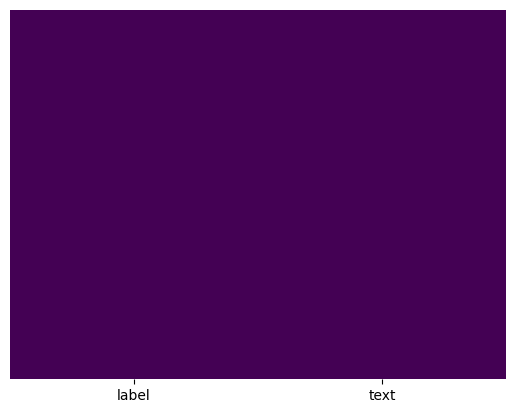

In [33]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = logmodel.predict(X_test)

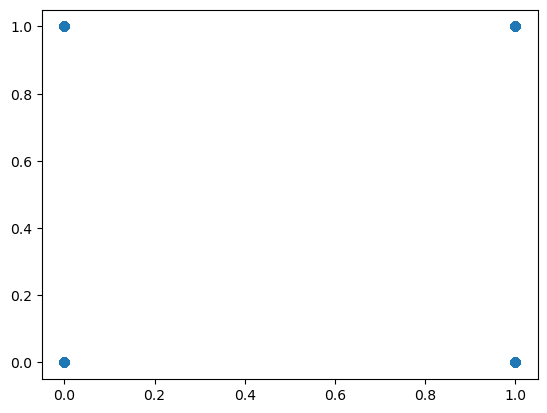

In [39]:
plt.scatter(y_test, y_pred)
plt.show()

In [40]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     33857
           1       0.96      0.97      0.97     30115

    accuracy                           0.97     63972
   macro avg       0.97      0.97      0.97     63972
weighted avg       0.97      0.97      0.97     63972



[[32620  1237]
 [  874 29241]]


In [44]:
new_email =["Earn money fast and easy by following this simple guide."]
new_email_vectorized = vectorizer.transform(new_email)
prediction = logmodel.predict(new_email_vectorized)

print("Spam" if prediction[0] == 1 else "Not Spam")

Spam
